In [ ]:
sys.path.append("settings/")

if 'creds' in sys.modules.keys(): del sys.modules['creds'];
import  creds
# print(creds.pg_creds)

In [169]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import sys; 
sys.path.append("../../lib/")



from  colorise import * 
from  geo import * 

import adds
adds = reload(adds)
from adds import * # import adds functions

init()


# if 'adds' in sys.modules.keys(): 
#     del sys.modules['adds'];
#     print ("del adds")

# print (sys.modules)

ii(dfr,1)

0:00:00.000 ₀╷₀₀╷₀₀.₀₀₀ init()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,HTML,Path,Struct,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__spec__,_log,_o,adds,clear_output,datetime
1,df_info,dfr,disp,display,draw_l,glob,gmtime,grpp,ii,init,isfile,join,l,listdir,math,merge_OKVED
2,np,os,pd,plt,read_rmsp,reload,requests,shutil,sizeof_fmt,start,strftime,time,tm,tmpxls,xl_rowcol_to_cell,xlspcl
3,zipfile,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


,name,rows,cols,memory,keys
0,df = dfr['ЦКАД_from_kml'],1,7,177,"['WKT', 'название', 'описание', 'name', 'showOnMap', 'strokeWidth', 'strokeOpacity']"


In [168]:
del sys.modules['colorise'];

In [87]:
# 1,37 км²5,36 км
kml_exp = '''"POLYGON ((38.0990274 56.0571205, 38.1404836 56.0424048, 38.1446035 56.0568809, 38.0990274 56.0571205))",Многоугольник 1,
"LINESTRING (38.1302697 56.046288, 38.1440026 56.056785)",Линия 3,
"LINESTRING (38.1393148 56.0567336, 38.1401731 56.0427368)",Линия 4,
"LINESTRING (38.099661 56.0569732, 38.142748 56.0517969)",Линия 6,'''


p1 = (56.0571205, 38.0990274, 56.0568809, 38.1446035)
p2 = (56.0568809, 38.1446035, 56.0424048, 38.1404836)
p3 = (56.0424048, 38.1404836, 56.0571205, 38.0990274)

a = ll_distance(*p1)  
b = ll_distance(*p2)  
c = ll_distance(*p3)  
s = (a + b + c) / 2  
Area = (s*(s-a)*(s-b)*(s-c)) ** 0.5  
print('The area of the triangle is \n%0.2f\n%0.2f %0.2f %0.2f \nP=%0.2f' %(Area, a, b, c , (a+b+c) ))
print('%0.2f %0.2f %0.2f' %(Area/a*2, Area/b*2, Area/c*2))

The area of the triangle is 
2.28
2.83 1.63 3.05 
P=7.51
1.61 2.80 1.50


In [4]:
# 2022-05-04 v2.0 - by connected objects
tm()
import simplekml


def Draw_geojson(fname,routes,points):
    kml = simplekml.Kml()
    for df_point in points:
        for i,row in df_point['points'].iterrows():
            pt2 = kml.newpoint(name= row['name'], coords=[(row['Longitude'],row['Latitude'])])
            pt2.style.iconstyle.icon.href = df_point['icon']
#             set color of icon to be cyan (RGB=#00ffff)
            pt2.style.iconstyle.color ='44ff8800' # aabbggrr
    
    coords = []      
    linecoords = []
    multilin = {}
#     disp (routes)
    
    print ("unique",pd.unique(routes['price']))
    
    prices = pd.unique(routes['price'])
    
    for pr in prices:
    
        price = pr 
        routes_pr = routes[routes['price']==pr]
        
#         disp(routes_pr[:3])
        
        multilin[pr] = kml.newmultigeometry(name="Тариф %s руб.\n %s"% (price,",".join(routes_pr["number"])), 
    # #                                 description="%s"% df_route["price_description"]
                                                          )
        
        for i,df_route in routes_pr.iterrows(): 
            linecoords = []

            geocoords = json.loads(df_route['geometry'])['coordinates']

            for g in geocoords: 
                [x,y] = g
                linecoords.append((x,y))
            multilin[pr].newlinestring(coords=linecoords)

        multilin[pr].style.linestyle.color = simplekml.Color.hex(colorise(price))   # Red
        multilin[pr].style.linestyle.width= 3  # 10 pixels

   
    kml.save(fname)   


df = dfr['parking_zone'] #[:2]

tm(df.shape[0])

# dfs = [y for x, y in df.groupby('price', as_index=False)]

df = df.sort_values('price')

# print(pd.unique(df['price']))
step = 40000

dfs = [df[d:d+step] for d in range(0,df.shape[0], step)]

chk_size = 20000
dfss = []

for d in dfs:
# for d in ['70']:
    price = d['price'][0:1].values[0]
    if ( d.shape[0] > chk_size):
        for i,n  in enumerate(range(0,  d.shape[0],chk_size)):
            dfss = dfss + [{"n":"%s_%s"%(price,i) ,"df":d[n:n+chk_size]}]
    else: dfss = dfss + [{"n":"%s"%price,"df":d}]


for k,d in enumerate(dfss):
    fn_code = "("+str(k)+")"+"_".join(pd.unique(d['df']['price'].astype(str)))
    Draw_geojson(r'C:\Users\S.Savinskiy\Downloads\parking'+fn_code+'.kml',
         d['df'],
         [
         ])
    
    tm([k,d['n'],d['df'].shape[0],fn_code])
tm('>>>')

*** Start at: 09:40:57 ₂₀₂₂₋₀₅₋₀₈  ************************************************************


ModuleNotFoundError: No module named 'simplekml'

In [294]:
import glob
import os
fpath = r'C:\Users\S.Savinskiy\Downloads\\'
files  = glob.glob(fpath+'parking*')

for f in files:
    os.remove(f)
tm([len(files), [ (x.split("\\")[-1]) for x in files ]] )

0:00:06.348 ₀╷₀₀╷₃₈.₂₄₅ [0, []]


1651685835.265795

In [7]:
# 2022-05-05
import folium
tm()

df = dfr['parking_zone'][::1]

def swap(p):
    res = []
    for pp in p:
        res = res + [[pp[1],pp[0]]]
    return res


def draw_map(df, p=()):
    
    (r0,r1,r2,r3,r4) = p 

    
    zone = [
        [r1-r3,r2-r4],
        [r1+r3,r2-r4],
        [r1+r3,r2+r4],
        [r1-r3,r2+r4],
        [r1-r3,r2-r4]
           ]
    
    prices = list(df['price'])
    
    lng_lat = list(map(swap, [json.loads(x['geometry'])['coordinates'] for i,x in df.iterrows()]))

    center = lng_lat[0][0]
    center = [55.72,37.60]
    
    f = folium.Figure(width=1600, height=800)
    
    m = folium.Map(location=center, max_bounds=True).add_to(f)
    
    m.fit_bounds([[r1-r3,r2-r4],[r1+r3,r2+r4]])

    my_PolyLine=folium.PolyLine(locations=zone ,weight=3,color='#ff880077')
    m.add_child(my_PolyLine)    
    m.add_child(folium.LatLngPopup())

    [lat_max,lon_max,lat_min,lon_min]=[0,0,90,180] 
    
    for i,c in enumerate(lng_lat):
        price = list(df['price'])[i]

        lat_max = max(c[0][0],lat_max)
        lon_max = max(c[0][1],lon_max)

        lat_min = min(c[0][0],lat_min)
        lon_min = min(c[1][1],lon_min)

        
        
        my_PolyLine=folium.PolyLine(locations=c,
                                    weight=3,
                                    color='#'+colorise(price)+"cc",
                                   tooltip=prices[i], )
        m.add_child(my_PolyLine)    
    
    dlat = (lat_max-lat_min)/2 
    dlon = (lon_max-lon_min)/2 
    print ([lat_max,lon_max,lat_min,lon_min], (lat_max-dlat, lon_max-dlon, dlat ,dlon ) )

    
    display(m)

params = (1000, 55.753145, 37.615845 , 0.3 , 1)

draw_map(df[::1], params)
tm('>>>>')


*** Start at: 09:42:00 ₂₀₂₂₋₀₅₋₀₈  ************************************************************


NameError: name 'colorise' is not defined

In [6]:
import requests
import json
# import pandas as pd

tm()

params = (1000, 55.798603, 45.480469305, 4.3, 15.3)


url = "https://api.parkomatica.ru/zone/get-list?radius1=%s&latitude=%s&longitude=%s845&latitudeDelta=%s&longitudeDelta=%s"%params

# GET
r = requests.get(url)

df = dfr['parking_zone'] = pd.DataFrame(r.json()['data'])

df.to_pickle('parking_zone.pcl')

tm(df.shape[0])
df[:3]
if(df.shape[0]> 0 ):
    draw_map(df, params )

*** Start at: 09:41:35 ₂₀₂₂₋₀₅₋₀₈  ************************************************************
0:00:01.874 ₀╷₀₀╷₀₁.₈₇₄ 15100


NameError: name 'draw_map' is not defined

In [448]:

df = dfr['geo_cache'] 
df.iloc[0]['ll']

[55.69, 37.347]

In [513]:
dfr['geo_cache']

,building,house_number,road,city_district,city,state,ISO3166-2-lvl4,region,postcode,country,country_code,lat,lon,boundingbox
0,Технопарк Сколково,42 к1,Большой бульвар,Можайский район,Москва,Москва,RU-MOW,Центральный федеральный округ,143026,Россия,ru,55.69,37.347,"[55.6909659, 55.6964862, 37.3465382, 37.3482907]"


In [589]:
del dfr['geo_cache']

In [581]:
ll = [39.19166, 51.661509]
ll = [51.660625, 39.194632]

location = geolocator.reverse(ll)
print(location)

Cтарая афишная тумба, улица 9 Января, Чичеры, Ленинский район, Воронеж, городской округ Воронеж, Воронежская область, Центральный федеральный округ, 394018, Россия


In [601]:
def get_reverse(ll):

    location = geolocator.reverse(ll)
    print (ll,location.raw['address'])
    gc = location.raw['address'] 
    [gc['latitude'],gc['longitude']] = ll
    gc['boundingbox'] = [location.raw['boundingbox']]
    res = pd.DataFrame(gc)
#     print (gc)
#     disp (res)
    return res


cache_path = r'db/geo_cache.pcl'

def geo_cache(ll):
 
    if 'geo_cache' in dfr.keys():
#         print ("1. dfr true")
        df =  dfr['geo_cache']       
    else:
        try:
#             print ("2. file true")
            df = dfr['geo_cache'] = pd.read_pickle(cache_path)
        except:
            print ("3. no file")
            df = pd.DataFrame(columns={'longitude','latitude'})
            
    res = df[(df['latitude'] == ll[0]) & (df['longitude'] == ll[1])]
    if(res.shape[0] == 0):
        print ("4. add new")
        res = pd.DataFrame(get_reverse(ll))
        df = df.append(res)
        df.to_pickle(cache_path)           
        dfr['geo_cache'] = df        
    return res
    
geo_cache([55.697,37.347]) 

,longitude,latitude,city_district,village,state,ISO3166-2-lvl4,region,postcode,country,country_code,...,suburb,highway,shop,amenity,building,residential,ISO3166-2-lvl15,municipality,industrial,town
0,37.347,55.697,Можайский район,Инновационный центр «Сколково»,Москва,RU-MOW,Центральный федеральный округ,143026,Россия,ru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [596]:
df = pd.read_pickle(cache_path)
df.count()

longitude          150
latitude           150
city_district       79
village              1
state              150
ISO3166-2-lvl4     150
region             149
postcode           149
country            150
country_code       150
boundingbox        150
county              31
house_number       101
road               147
neighbourhood       20
city               147
tourism              3
craft                2
quarter              7
suburb             100
highway              4
shop                 2
amenity             27
building             6
residential          1
ISO3166-2-lvl15     14
municipality         2
industrial           1
town                 1
dtype: int64

In [597]:
ii(dfr,1)

,name,rows,cols,memory,keys
0,df = dfr['parking_zone'],15100,7,"845,728","['id', 'number', 'geometry', 'price_description', 'price', 'weekends', 'periods']"
1,df = dfr['georeverse_parkig'],16,18,"2,432","['house_number', 'road', 'neighbourhood', 'city_district', 'city', 'county', 'state', 'ISO3166-2-lvl4', 'region', 'postcode', 'country', 'country_code', 'building', 'suburb', 'residential', 'amenity', 'quarter', 'ISO3166-2-lvl15']"
2,df = dfr['ЦКАД_from_kml'],1,7,177,"['WKT', 'название', 'описание', 'name', 'showOnMap', 'strokeWidth', 'strokeOpacity']"
3,df = dfr['geo_cache'],150,29,"36,000","['longitude', 'latitude', 'city_district', 'village', 'state', 'ISO3166-2-lvl4', 'region', 'postcode', 'country', 'country_code', 'boundingbox', 'county', 'house_number', 'road', 'neighbourhood', 'city', 'tourism', 'craft', 'quarter', 'suburb', 'highway', 'shop', 'amenity', 'building', 'residential', 'ISO3166-2-lvl15', 'municipality', 'industrial', 'town']"


In [423]:
location = geolocator.reverse([55.69,37.347])

location.raw

{'place_id': 191873293,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 382743663,
 'lat': '55.693769849999995',
 'lon': '37.34740556441982',
 'display_name': 'Технопарк Сколково, 42 к1, Большой бульвар, Можайский район, Москва, Центральный федеральный округ, 143026, Россия',
 'address': {'building': 'Технопарк Сколково',
  'house_number': '42 к1',
  'road': 'Большой бульвар',
  'city_district': 'Можайский район',
  'city': 'Москва',
  'state': 'Москва',
  'ISO3166-2-lvl4': 'RU-MOW',
  'region': 'Центральный федеральный округ',
  'postcode': '143026',
  'country': 'Россия',
  'country_code': 'ru'},
 'boundingbox': ['55.6909659', '55.6964862', '37.3465382', '37.3482907']}

In [612]:
dfr['parking_zone'].count()

id                   15100
number               15100
geometry             15100
price_description    13765
price                15100
weekends             15100
periods              15100
dtype: int64

In [629]:
from geopy.geocoders import Nominatim
tm()
geolocator = Nominatim(user_agent="jupyter")

df = dfr['parking_zone'][::3000]

lap = 0

georeverse = pd.DataFrame()

for i,r in df.iterrows():
    c = json.loads(r['geometry'])['coordinates'][0]
    
    gc = geo_cache([c[1],c[0]])
    
    jrow = {
        'city': gc['city'][0],
        'region': gc['region'][0],
        'road':gc['road'][0],
        'geometry':json.loads(r['geometry'])['coordinates'],
        'price': r['price'],
        'latitude': c[0],
        'longitude': c[1],
            
           }
    
#     disp(gc[['city','region']]) 
#     print(r[['price']])
    
    georeverse = georeverse.append(jrow, ignore_index=True)  


    if lap%10 == 0: 
        tm([i,gc['city']])
    lap += 1
#     print (location.raw)

    
dfr['georeverse_parkig'] = df = pd.DataFrame(georeverse)

tm("\n".join(["Count",str(df.count())]))
df[:3]

*** Start at: 21:14:34 ₂₀₂₂₋₀₅₋₀₅  ************************************************************
0:00:00.007 ₀╷₀₀╷₀₀.₀₀₇ [0, 0    Нижний Новгород
Name: city, dtype: object]
0:00:00.018 ₀╷₀₀╷₀₀.₀₂₆ Count
city         6
region       6
road         6
geometry     6
price        6
latitude     6
longitude    6
dtype: int64


,city,region,road,geometry,price,latitude,longitude
0,Нижний Новгород,Приволжский федеральный округ,Нижне-Волжская набережная,"[[44.005571008, 56.331992365], [44.000903964, 56.331689023]]",60.0,44.005571,56.331992
1,Пермь,Приволжский федеральный округ,улица Максима Горького,"[[56.251537, 58.016116], [56.251415, 58.016241]]",20.0,56.251537,58.016116
2,Москва,Центральный федеральный округ,Зоологическая улица,"[[37.582335, 55.764214], [37.58249, 55.764289], [37.582807, 55.764446]]",380.0,37.582335,55.764214


In [ ]:
place_id	licence	osm_type	osm_id	lat	lon	display_name	address	boundingbox
0	285140293	Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright	relation	2860612	56.331676900000005	44.004868200000004	1Б, Нижне-Волжская набережная, Кремль, Нижегородский район, Нижний Новгород, городской округ Нижний Новгород, Нижегородская область, Приволжский федеральный округ, 603082, Россия	{'house_number': '1Б', 'road': 'Нижне-Волжская набережная', 'neighbourhood': 'Кремль', 'city_district': 'Нижегородский район', 'city': 'Нижний Новгород', 'county': 'городской округ Нижний Новгород', 'state': 'Нижегородская область', 'ISO3166-2-lvl4': 'RU-NIZ', 'region': 'Приволжский федеральный округ', 'postcode': '603082', 'country': 'Россия', 'country_code': 'ru'}	[56.3315216, 56.3318322, 44.0038091, 44.0059273]

In [ ]:
from geopy.geocoders import GoogleV3
geolocator = GoogleV3(api_key='Your_API_Key')
location = geolocator.reverse("52.509669, 13.376294")
print(location.address)

In [378]:
dfr = {}

In [379]:
# 2022-04-22 read_parking
import json
data = []
def load_park_zones():
    fname = r'C:\Users\S.Savinskiy\Downloads\response_1650638252002.json'
    fname = r'C:\Users\S.Savinskiy\Downloads\response_2022-05-04.json'
    
    with open(fname,'rb') as f:
        data = json.loads(f.read())
    
    parkings = data['data']   #[:2]
    
#     print (parkings)
    
#     df_nested_list = pd.json_normalize(parkings, record_path =['coordinates'])
    
    return pd.DataFrame(parkings)

dfr['parking_zone'] = df  = load_park_zones()


tm(['>>>>',df.info(),
dfr['parking_zone'].count()
   ])
disp(df[:3])
df.groupby(['price']).count().reset_index()['price'].to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 15100 non-null  int64 
 1   number             15100 non-null  object
 2   geometry           15100 non-null  object
 3   price_description  13765 non-null  object
 4   price              15100 non-null  int64 
 5   weekends           15100 non-null  object
 6   periods            15100 non-null  object
dtypes: int64(2), object(5)
memory usage: 825.9+ KB
0:20:36.995 ₀╷₂₀╷₅₃.₅₅₄ ['>>>>', None, id                   15100
number               15100
geometry             15100
price_description    13765
price                15100
weekends             15100
periods              15100
dtype: int64]


,id,number,geometry,price_description,price,weekends,periods
0,32784,057,"{""type"":""LineString"",""coordinates"":[[44.005571008,56.331992365],[44.000903964,56.331689023]]}",60руб/час с 08:00 до 20:00,60,[],[]
1,32785,001,"{""type"":""LineString"",""coordinates"":[[43.98706913,56.328997505],[43.987573385,56.32839672]]}",60руб/час с 08:00 до 20:00,60,[],[]
2,32786,013,"{""type"":""LineString"",""coordinates"":[[44.017179608,56.316502508],[44.017724097,56.316670603]]}",60руб/час с 08:00 до 20:00,60,[],[]


[0, 1, 20, 30, 40, 50, 60, 70, 80, 100, 150, 200, 380, 450]

*** Start at: 13:49:11 ₂₀₂₂₋₀₄₋₂₅  ************************************************************


<BarContainer object of 20 artists>

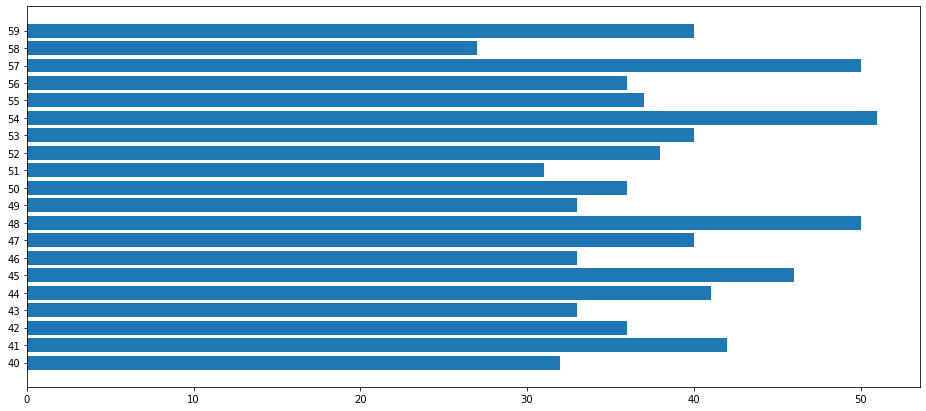

In [366]:


tm()
from datetime import datetime
df = dfr['bmo_last_devide_id'] = pd.read_csv(r'C:\Users\S.Savinskiy\Downloads\bmo_last.csv')

# ts =  df.sort_values(['unixtime'], ascending=False)
# print (ts)
df['iso_time'] = df['unixtime'].apply(lambda x: str(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')))

df = df[df['unixtime'] > (df['unixtime'].max() - 3600*24*300 )   ]

dfg = df.groupby(df['iso_time'].str[-2:19])['device_id'].count().reset_index()

dfg = dfg.sort_values(['iso_time'])[-20:]

# print(dfg.shape[0],dfg.info())

plt.figure(figsize=(16,7))
plt.barh(dfg['iso_time'],dfg['device_id'])

In [95]:
df = dfr['track'] = pd.read_csv(r'C:\Users\S.Savinskiy\Downloads\89701010068337419768 (1).csv')
bins = [-1,1e-3,1e-2,1e-1,1]

d = 'speed'

cuts = pd.cut(df[d],10).apply(lambda x: pd.Interval(left=int(round(x.left)), right=int(round(x.right))))

g_step=10
cuts = pd.cut(df[d],range(0,df[d].max()+g_step*2,g_step))

dfg = df.groupby(cuts ).count().rename(columns={d:'bar'}).reset_index()
# disp(dfg)


x = dfg[d].astype(str)
y = dfg['bar']

plt.figure(figsize=(10,4))
barlist = plt.barh(x, y)
plt.bar_label(barlist)

for i,sp in enumerate(dfg[d]):
    barlist[i].set_color(colorise(sp.left,palettes['speed']))

plt.show()
plt.figure(figsize=(11,11))
plt.scatter(df['latitude'], df['longitude'], c=df['speed'].apply(lambda x: colorise(x)))

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\S.Savinskiy\\Downloads\\89701010068337419768 (1).csv'

In [65]:
pd.DataFrame(df['periods'][0])['price'].max()

38000

In [210]:
ii(dfr,1)

,name,rows,cols,memory,keys
0,df = dfr['track'],1238,6,"59,552","['to_timestamp', 'latitude', 'longitude', 'speed', 'fuel', 'speed_engine']"
1,df = dfr['track2'],1238,6,"59,552","['to_timestamp', 'latitude', 'longitude', 'speed', 'fuel', 'speed_engine']"


In [34]:
# 2022-04-16 https://developers.google.com/kml/documentation/kmlreference
# https://kml4earth.appspot.com/icons.html
# https://icons8.com/icon/set/atransport/color
# hotel - https://img.icons8.com/office/32/hotel-information.png
# gas station https://img.icons8.com/color/32/gas-station.png

tm()
import simplekml


def Draw(fname,routes,points):
    kml = simplekml.Kml()
    for df_point in points:
        for i,row in df_point['points'].iterrows():
            pt2 = kml.newpoint(name= row['name'], coords=[(row['Longitude'],row['Latitude'])])
            pt2.style.iconstyle.icon.href = df_point['icon']
#             set color of icon to be cyan (RGB=#00ffff)
            pt2.style.iconstyle.color ='44ff8800' # aabbggrr
    
                                          
    for df_route in routes:                                      
        route = [tuple(x) for x in df_route['route'][['Longitude','Latitude']].values]

        lin = kml.newlinestring(name=df_route["name"])
        lin.style.linestyle.color = '228800ff'  # Red
        lin.style.linestyle.width= 5  # 10 pixels
        lin.coords = route
    kml.save(fname)    



*** Start at: 13:25:26 ₂₀₂₂₋₀₄₋₂₂  ************************************************************


In [6]:
tm()
db = client["tourservice"]
qwr = {"$and":[{"category":"EAT/DRINK"}, {"subcategory": "CAFE"} , 
               {"location": {"$near": {"$maxDistance":1000, 
                                     "$geometry":{"type":"Point", 
                                                  "coordinates":[37.35,55.7]}}}}]}

qwr_loc = [{"location": {"$near": {"$maxDistance":1000, 
                                     "$geometry":{"type":"MultiPoint", 
                                                  "coordinates":[37.35,55.7]}}}},
            {"location": {"$near": {"$maxDistance":1000, 
                                     "$geometry":{"type":"MultiPoint", 
                                                  "coordinates":[37.36,55.7]}}}}]


qwr_loc = {
        "location" : {
                "type" : "Point",
                "coordinates" : [
                        37.35,
                        55.7
                ]
        },
        "distance" : 1000
}

qwr = {"$and":[{"category":"EAT/DRINK"}, {"subcategory": "CAFE"}, qwr_loc] }

# qwr = {"name":"Десяточка"}


bd_find = db.poi_gson.find(qwr)

db_find = db.poi_gson.aggregate([
    { "$geoNear": {
        "near": {
            "type": "Point",
            "coordinates": [
               37.35,
               55.7
            ]
        },
        "maxDistance": 2000,
        "spherical": True,
        "distanceField": "distance"
    }}
])


df = pd.DataFrame(list(db_find))


    
tm(['>>>>',df.count()])
df

NameError: name 'tm' is not defined

In [9]:
df[:5]

""


In [145]:
tm()

coll  = db.poi_gson

coll.drop()

coll  = db.poi_gson

for element in db.poi.find().limit(20000): 
    coll.insert_many([{
        "_id": element["_id"],
        "name": element["name"],
        "category": element["category"],
        "subcategory": element["subcategory"],
        "loc": element["lng"], element["lat"]]
        
        }}]);

tm('>>>>>')

*** Start at: 19:08:40 ₂₀₂₂₋₀₄₋₁₉  ************************************************************
0:00:11.649 ₀╷₀₀╷₁₁.₆₄₉ >>>>>


In [96]:
tm()

coll  = db.poi_gson
coll.drop()

ins = []

els = db.poi.find().limit(40000)

tm('1. get els')

for element in els: 
    ins = ins + [{
        "_id": element["_id"],
        "name": element["name"],
        "category": element["category"],
        "subcategory": element["subcategory"],
        "loc": {
            "type": "Point",
            "coordinates": [element["lng"], element["lat"]]
        
        }}]

tm(['1. list ready',len(str(ins))])

coll.insert_many(ins)

tm(['>>>>>'])

*** Start at: 16:52:43 ₂₀₂₂₋₀₄₋₁₉  ************************************************************
0:00:00.024 ₀╷₀₀╷₀₀.₀₂₄ 1. get els
0:00:14.715 ₀╷₀₀╷₁₄.₇₃₉ ['1. list ready', 7675403]
0:00:00.924 ₀╷₀₀╷₁₅.₆₆₄ ['>>>>>']


In [107]:
ii(dfr,1)

,name,rows,cols,memory,keys
0,df = dfr['route_574'],13536,6,"758,016","['lat', 'lng', 'unixtime', 'isotime', 'fuel', 'speed']"
1,df = dfr['osm poi'],1166350,6,"55,984,928","['id', 'name', 'category', 'subcategory', 'lng', 'lat']"
2,df = dfr['poi_accomodation'],34,4,"1,216","['Latitude', 'Longitude', 'name', 'subcategory']"


In [747]:
#2022-04-05 расчет дистанции 

import math


def geo_shift(p, dist):
    
    cos_d = math.cos( p[1]  * math.pi/180 )

    lat_delt = dist / 110.574 / 1000
    lng_delt = dist / 111.320 / 1000 /cos_d


    return [lng_delt, 
            lat_delt, 
            p[0] + lng_delt, 
            p[1] + lat_delt,
            p[0] - lng_delt, 
            p[1] - lat_delt
           ]



def f_distance(lat1, lon1, lat2, lon2,unit = "K") :
    
    if ((lat1 == lat2) & (lon1 == lon2)):
        return 0

    else:
        radlat1 = math.pi * lat1/180;
        radlat2 = math.pi * lat2/180;
        theta = lon1-lon2;
        radtheta = math.pi * theta/180;
        dist = math.sin(radlat1) * math.sin(radlat2) + math.cos(radlat1) * math.cos(radlat2) * math.cos(radtheta);
        if (dist > 1) :
            dist = 1;
        
        dist = math.acos(dist);
        dist = dist * 180/math.pi;
        dist = dist * 60 * 1.1515;
        if unit=="K": dist = dist * 1.609344 
        if unit=="N": dist = dist * 0.8684 
        return dist;

gs = geo_shift([37.40, 55.7], 3000)
print ( '%s,%s\n%s,%s' % tuple(gs[2:]))
    
f_distance(55.1,37.20, 55.2,37.3,"K")

37.44782269657372,55.727131151988715
37.352177303426274,55.67286884801129


12.806276228290576

In [487]:
# 2022-04-08 POI to local PG

def db_sql(sqls):
    conn = psycopg2.connect(connection_string)

    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);

    print("Database opened successfully")
    curs = conn.cursor();

     #drop_database, create_database, 


    for sql in sqls:
        try:
            curs.execute(sql)
            # NB : you won't get an IntegrityError when reading
        except Exception as ex:
            print(ex, sql)
            
    tm('init db')


    conn.close()
    
sql_database_info =  '''select t1.datname AS db_name,  
                    pg_size_pretty(pg_database_size(t1.datname)) as db_size
                    from pg_database t1
                    order by pg_database_size(t1.datname) desc;'''


create_poi_table = '''DROP TABLE IF EXISTS POI; CREATE TABLE POI (
    ID  varchar(255) PRIMARY KEY,
    CATEGORY varchar(32),
    SUBCATEGORY varchar(32),
    MAME varchar(128),
    LON varchar(32),
    LAT varchar(32),
    LON_F float,
    LAT_F float,
    LON_I int,
    LAT_I int
);'''

create_route_table = '''DROP TABLE IF EXISTS ROUTE; CREATE TABLE ROUTE (
    ID  varchar(255) PRIMARY KEY,
    ROUTE_NAME varchar(255),
    UNIXTIME varchar(255),
    LON varchar(255),
    LAT varchar(255),
    iso_time varchar(64),
    FUEL float,
    SPEED int
);'''    
    

sqls = [create_route_table]    

tm()
db_sql(sqls)
tm('>>>')

*** Start at: 10:56:26 ₂₀₂₂₋₀₄₋₁₂  ************************************************************
0:00:00.000 ₀╷₀₀╷₀₀.₀₀₀ >>>


In [ ]:

# 2022-04-08  read_csv to_sql from file by chunk *******************


from sqlalchemy import create_engine

cols = ['Unnamed: 0', 'ID', 'NAME', 'CATEGORY', 'SUBCATEGORY', 'LON', 'LAT',
       'SRID', 'WKT', 'INTERNATIONAL_NAME', 'STREET', 'WIKIPEDIA', 'PHONE',
       'CITY', 'EMAIL', 'ALTERNATIVE_NAME', 'OPENING_HOURS', 'DESCRIPTION',
       'WEBSITE', 'LAST_UPDATE', 'OPERATOR', 'POSTCODE', 'COUNTRY', 'FAX',
       'IMAGE', 'HOUSENUMBER', 'OTHER_TAGS']

tm()

fname = r'C:\_dev\jupyter_notebook\jnlab\prj\poi\2021-12-18\russia_poi\russia_poi.csv'

columns = { 'ID':'id',
            'NAME':'name',
            'CATEGORY':'category',
            'SUBCATEGORY':'subcategory',
            'LON':'lng',
            'LAT':'lat'
          }

# usecols=columns, 

df = pd.read_csv(fname, sep='|', usecols=columns.keys(),  nrows = 10000000 )

dfr['osm poi'] = df = df.rename(columns=columns)

tm(['1. read poi', df.count()])


engine = create_engine()

dflap = pd.DataFrame(columns=['chunk','t','lap'])


tm('2. start insert')

for lap in range(0,1):
    dflist = []
    
    for chs in range(10,11):
        start_lap = time.time()
        df.to_sql("poi", engine, if_exists='replace', chunksize = 2**chs)
        tm(['3. end insert', chs])
        delt_lap = time.time() - start_lap 
        dflap.loc[len(dflap)] = [chs,delt_lap,lap]
    
    df_out = (dflap.pivot_table(index=['chunk'], columns='lap', values='t')
                .rename_axis(columns=None)
             ).reset_index()


    df_out.loc[:, df_out.columns != 'chunk'].plot(figsize=(10,7))
    plt.show()

tm('3. insert finished')


ix_poi_lat = '''CREATE INDEX ix_poi_lat
    ON public.poi USING btree
    (lat ASC NULLS LAST)
    TABLESPACE pg_default;'''

ix_poi_lng = '''CREATE INDEX ix_poi_lng
    ON public.poi USING btree
    (lng ASC NULLS LAST)
    TABLESPACE pg_default;'''

db_sql([ix_poi_lat,ix_poi_lng])
    
    
tm('>>>')



*** Start at: 23:06:19 ₂₀₂₂₋₀₄₋₁₄  ************************************************************
0:00:09.585 ₀╷₀₀╷₀₉.₅₈₅ ['1. read poi', id             1166350
name           1166350
category       1166350
subcategory    1166350
lng            1166350
lat            1166350
dtype: int64]
0:00:00.002 ₀╷₀₀╷₀₉.₅₈₇ 2. start insert
